In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def DecisionTreeEmailSpamDetection():
  # Load dataset with correct encoding
  data = pd.read_csv('spam.csv', encoding='latin1')

  # Clean and prepare data
  # Retain relevant columns and rename them for clarity
  data = data[['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].rename(
      columns={'v1': 'label', 'v2': 'message', 'Unnamed: 2': 'feature_1', 'Unnamed: 3': 'feature_2', 'Unnamed: 4': 'feature_3'}
  )
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Map labels to numerical values

  # Handle missing values in additional features (if any)
  data.fillna('', inplace=True)  # Replace NaN values with empty strings

  # Combine text features (message + additional features) for vectorization
  data['combined_features'] = data['message'] + ' ' + data['feature_1'] + ' ' + data['feature_2'] + ' ' + data['feature_3']

  # Convert text to numerical features using CountVectorizer
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(data['combined_features'])  # Transform combined text features into feature vectors
  y = data['label']  # Target variable

  # Split the dataset into training and testing sets (80% train, 20% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Decision Tree Classifier model
  dt_classifier = DecisionTreeClassifier(random_state=42)
  dt_classifier.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = dt_classifier.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
  print("Classification Report:\n", classification_report(y_test, y_pred))

  # Calculate and Display the Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Accuracy: 96.77%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.91      0.85      0.88       150

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



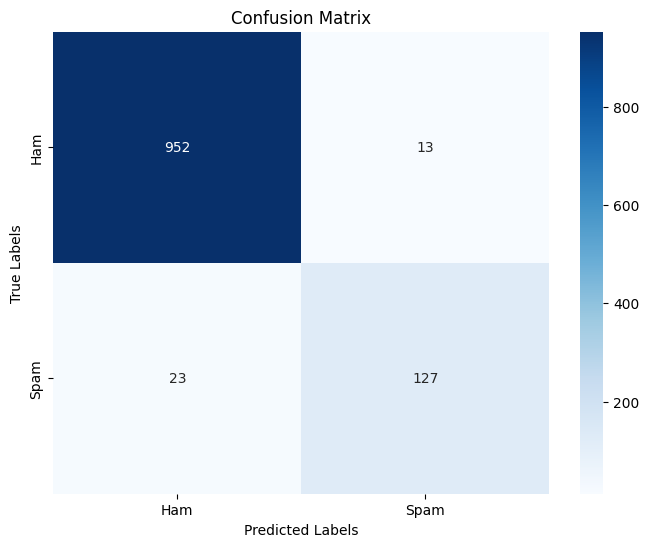

In [3]:
if __name__ == "__main__":
    DecisionTreeEmailSpamDetection()

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def RandomForestEmailSpamDetection():
  # Load dataset with correct encoding
  data = pd.read_csv('spam.csv', encoding='latin1')

  # Clean and prepare data
  # Retain relevant columns and rename them for clarity
  data = data[['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].rename(
      columns={'v1': 'label', 'v2': 'message', 'Unnamed: 2': 'feature_1', 'Unnamed: 3': 'feature_2', 'Unnamed: 4': 'feature_3'}
  )
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Map labels to numerical values

  # Handle missing values in additional features (if any)
  data.fillna('', inplace=True)  # Replace NaN values with empty strings

  # Combine text features (message + additional features) for vectorization
  data['combined_features'] = data['message'] + ' ' + data['feature_1'] + ' ' + data['feature_2'] + ' ' + data['feature_3']

  # Convert text to numerical features using CountVectorizer
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(data['combined_features'])  # Transform combined text features into feature vectors
  y = data['label']  # Target variable

  # Split the dataset into training and testing sets (80% train, 20% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Random Forest Classifier model
  rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)  # Use 100 trees in the forest
  rf_classifier.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = rf_classifier.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
  print("Classification Report:\n", classification_report(y_test, y_pred))

  # Calculate and Display the Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Accuracy: 97.40%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



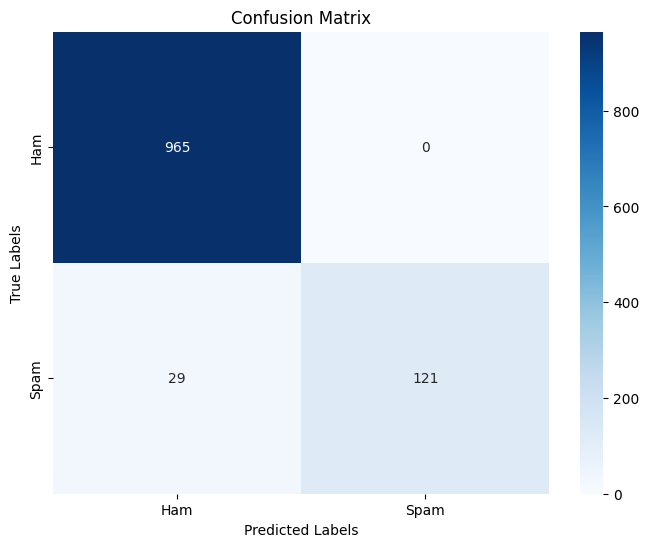

In [6]:
if __name__ == "__main__":
    RandomForestEmailSpamDetection()

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def LogisticRegressionEmailSpamDetection():
  # Load dataset with correct encoding
  data = pd.read_csv('spam.csv', encoding='latin1')

  # Clean and prepare data
  # Retain relevant columns and rename them for clarity
  data = data[['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].rename(
      columns={'v1': 'label', 'v2': 'message', 'Unnamed: 2': 'feature_1', 'Unnamed: 3': 'feature_2', 'Unnamed: 4': 'feature_3'}
  )
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Map labels to numerical values

  # Handle missing values in additional features (if any)
  data.fillna('', inplace=True)  # Replace NaN values with empty strings

  # Combine text features (message + additional features) for vectorization
  data['combined_features'] = data['message'] + ' ' + data['feature_1'] + ' ' + data['feature_2'] + ' ' + data['feature_3']

  # Convert text to numerical features using CountVectorizer
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(data['combined_features'])  # Transform combined text features into feature vectors
  y = data['label']  # Target variable

  # Split the dataset into training and testing sets (80% train, 20% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Logistic Regression model
  # Removed 'random_state' parameter as it is not supported in LogisticRegression
  lr_classifier = LogisticRegression()  
  lr_classifier.fit(X_train, y_train)

  # Evaluate the model on the test set
  y_pred = lr_classifier.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
  print("Classification Report:\n", classification_report(y_test, y_pred))

  # Calculate and Display the Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Accuracy: 97.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



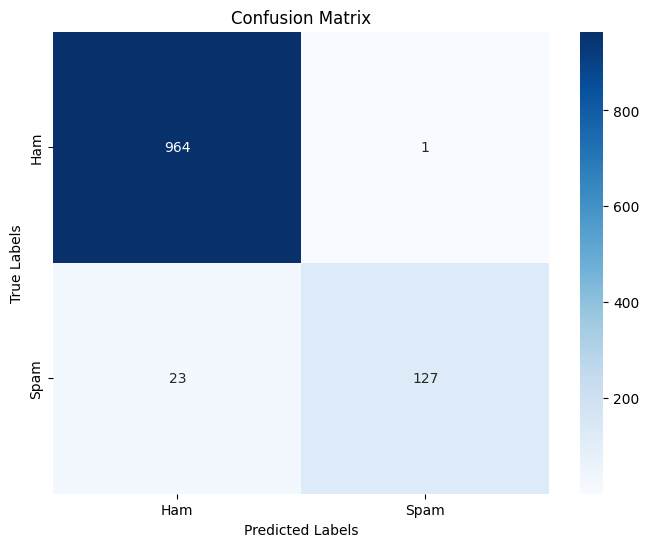

In [9]:
if __name__ == "__main__":
    LogisticRegressionEmailSpamDetection()